In [1]:
"""
심화 학습: k-평균 군집화, k-mean clustering
비지도 학습 모델
군집화 => 데이터의 성질로부터 최적의 분할 또는 점 그룹의 개별 레이블을 학습
"""
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, seaborn as sns; sns.set()

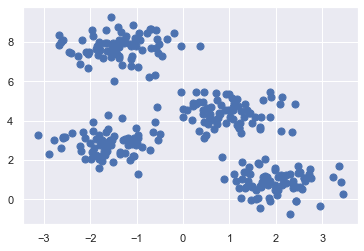

In [2]:
"""
k-평균 알고리즘은 레이블이 없는 다차원 데이터세트 내에 사전 정의된 군집의 개수를 찾아낸다

- 군집 중앙은 해당 군집에 속하는 모든 점의 산술 평균이다
- 각 점은 다른 군집의 중앙보다 자신이 속한 군집의 중앙에 더 가깝다
"""

# 뚜렷이 구분되는 4개의 영역을 포함한 2차원 데이터세트, 비지도 알고리즘
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
# KMeans estimator API
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

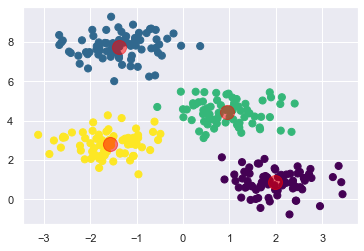

In [4]:
# 결과를 시각화 (+ 군집 중앙)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.5);

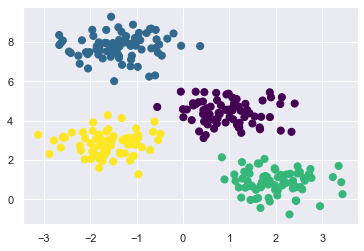

In [5]:
# k-평균 알고리즘: 기댓값-최대화(Expectation-Maximization)
"""
1. 일부 군집 중심을 추측한다
2. 수렴될 때까지 다음을 반복한다
    E-단계: 점을 가장 가까운 군집 중심에 할당한다
    M-단계: 군집 중심을 평균값에 설정한다
"""

from sklearn.metrics import pairwise_distances_argmin

def find_cluster(X, n_clusters, rseed=2):
    # 1. 임의로 군집 선택
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. 가장 가까운 중심을 기반으로 레이블 할당
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. 점들의 평균으로부터 새로운 군집 발견
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        #2c. 수렴 여부 검사
        if np.allclose(centers, new_centers):
            break # break out of while loop if centers == new_centers
        centers = new_centers # update centers
        
    return centers, labels

centers, labels = find_cluster(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap="viridis");

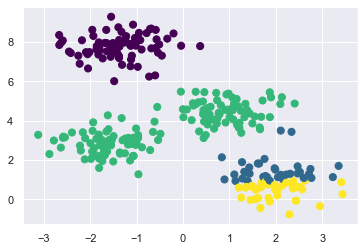

In [6]:
"""
기댓값 - 최대화 관련 주의사항

전체적으로 최적화된 결과를 얻을 수 없을지도 모른다
"""
centers, labels = find_cluster(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap="viridis");

# rseed = 0 => 좋지 않은 임의의 시작점
# n_init=10 기본값

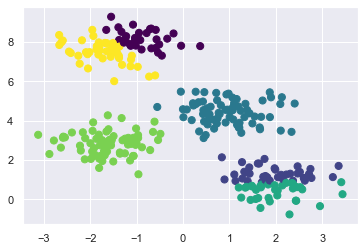

In [7]:
"""
군집의 개수가 사전에 정해져야 한다
알고리즘이 데이터로부터 군집의 개수를 학습할 수 없다

=> 결과가 의미가 있느냐는 물음은 분명하게 대답하기 어렵다
"""
centers, labels = find_cluster(X, 6, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap="viridis");

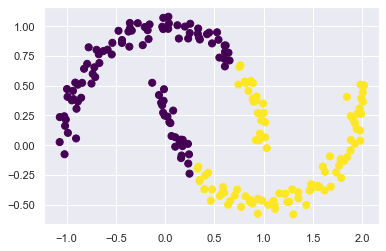

In [8]:
"""
k-평균은 선형 군집 경계로 한정된다
군집이 복잡한 지형도를 갖는 경우 종종 비효율적임을 의미한다
(특히, k-평균 군집 간의 경계는 언제나 선형이다)
"""
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap="viridis");

C:\Users\Jimmy Son\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


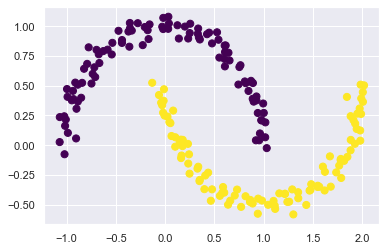

In [9]:
# SciKit-Learn에서는 커널화된 k-평균의 한 버전이 SpectralClustering 추정기 내에 구현돼있다
# 데이터의 고차원 표헌을 위해 최근접 이웃의 그래프를 사용하고 k-평균 알고리즘을 사용해 레이블을 할당한다
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,
                           affinity="nearest_neighbors",
                           assign_labels="kmeans")
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap="viridis");

In [10]:
"""
k-평균은 표본 수가 많을 때 느려질 수 있다
""";

In [11]:
# 예제1: 숫자 데이터에 k-평균 알고리즘 사용하기
# k-평균을 사용해 원본의 레이블 정보를 사용하지 않고 비슷한 숫자를 식별
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [12]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape # (n_clusters, n_features)

(10, 64)

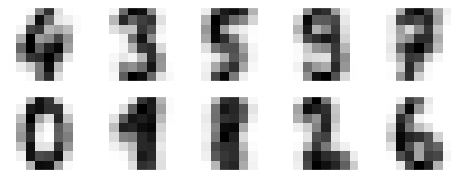

In [13]:
# 군집 중심 플로팅
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation="nearest", cmap=plt.cm.binary)
    
# 1과 8을 제외하면 인식 가능한 숫자를 중심으로 갖는 군집을 구할 수 있다

In [14]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask], keepdims=True)[0]

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels) # ~80%를 올바르게 분류

0.7935447968836951

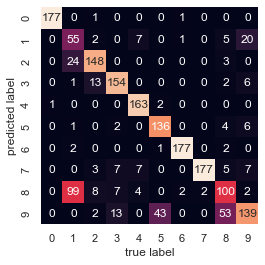

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel("true label")
plt.ylabel("predicted label");

In [17]:
# t-SNE (t-분포 확률 이웃 임베딩)
# 군집 내의 점을 보존하는 데 능숙한 비선형 임베딩 알고리즘
from sklearn.manifold import TSNE

# 데이터 사영: 이 단계는 수 초가 걸린다
tsne = TSNE(n_components=2, init="pca", random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# 군집 게산
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# 레이블 바꾸기
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask], keepdims=True)[0]
    
# 정확도 계산
accuracy_score(digits.target, labels) # 거의 94%의 분류 정확도

C:\Users\Jimmy Son\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Jimmy Son\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


0.9337785197551475

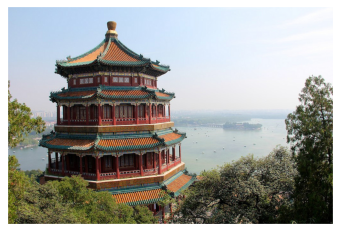

In [18]:
# 예제 2: 색상 압축에 k-평균 사용하기
# 알림: 이 코드를 실행하려면 pillow 패키지가 설치돼 있어야 함
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [19]:
# 픽셀 집합을 보는 한 가지 방법은 3차원 색공간(color space)에서 점 클라우드로 보기
# [n_samples, n_features]로 형태를 재구성하고 색상에 0에서 1 사이에 놓일 수 있도록 척도를 바꾸기
data = china / 255.0 # 0에서 1 사이 값 사용
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

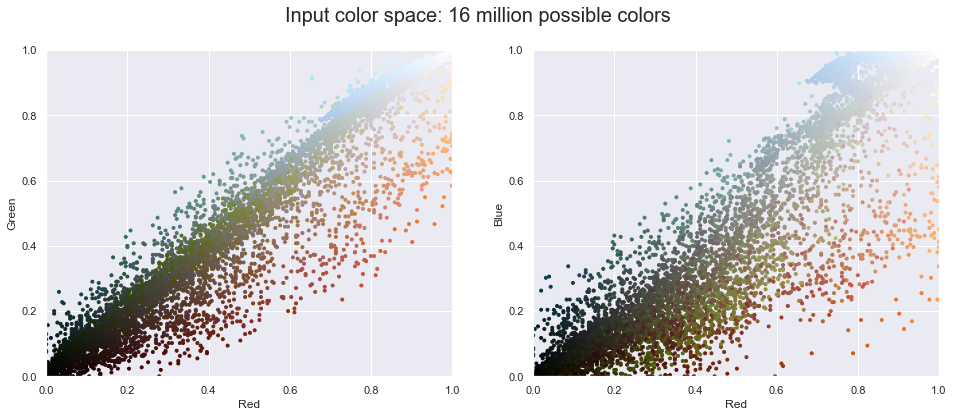

In [20]:
# 효율성을 위해 픽셀 10,000개의 부분집합을 사용해 이 색 공간에서 이 픽셀을 시각화
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    # 임의의 부분 집합 선택
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker=".")
    ax[0].set(xlabel="Red", ylabel="Green", xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker=".")
    ax[1].set(xlabel="Red", ylabel="Blue", xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20);
    
plot_pixels(data, title="Input color space: 16 million possible colors")

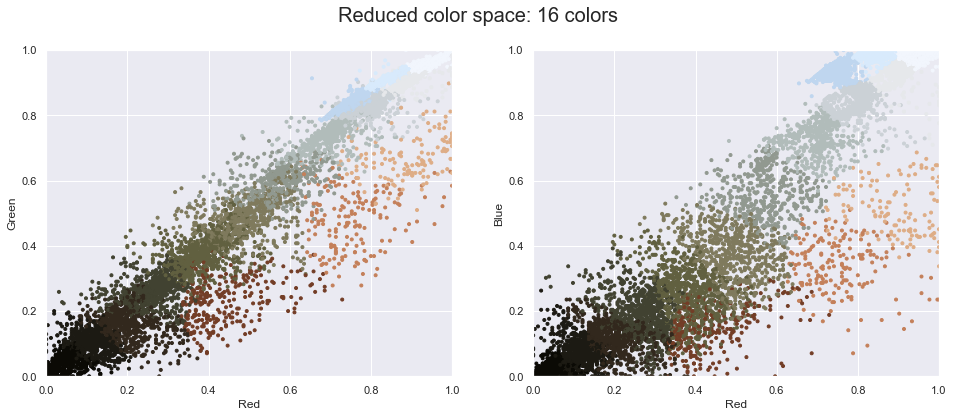

In [21]:
# k-평균 군집화를 사용해 1,600만 가지 색을 16개의 색으로 줄이자
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

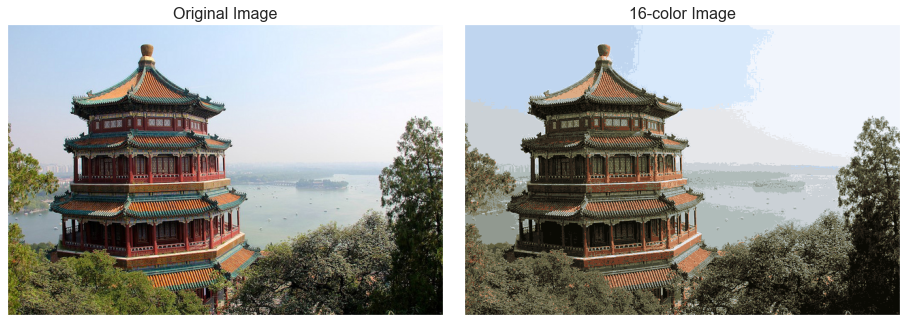

In [22]:
# 새로운 색상을 픽셀 공간이 아닌 이미지 공간에 플로팅
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image", size=16);